## Author - DIKSHITA



### Exploratory Data Analysis - Terrorism




### Problem Statement: Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’

.


The dataset can be found at :  https://drive.google.com/file/d/1luTU7xBvI7QAGPbQMxEHcgKUi9d6UeP_/view



#### Let's begin 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin1')
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN



### We would like to rename the columns in our dataset for better understanding

In [3]:
data.columns.values


array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [4]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [5]:
data = data[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]

### Now let's get a table displayed having year, month, day, attacktype, target etc.

In [6]:
data.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [7]:

data['Wound'] = data['Wound'].fillna(0)          # fills 0 in place of NaN
data['kill'] = data['kill'].fillna(0)            # # fills 0 in place of NaN

data['Casualities'] = data['kill'] + data['Wound']


#### Having got the Null values removed, let's check how our data looks

In [9]:
data.describe()

,Year,Month,day,latitude,longitude,kill,Wound,Casualities
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


##  Looks appropriate !

## Terrorist activity region-wise

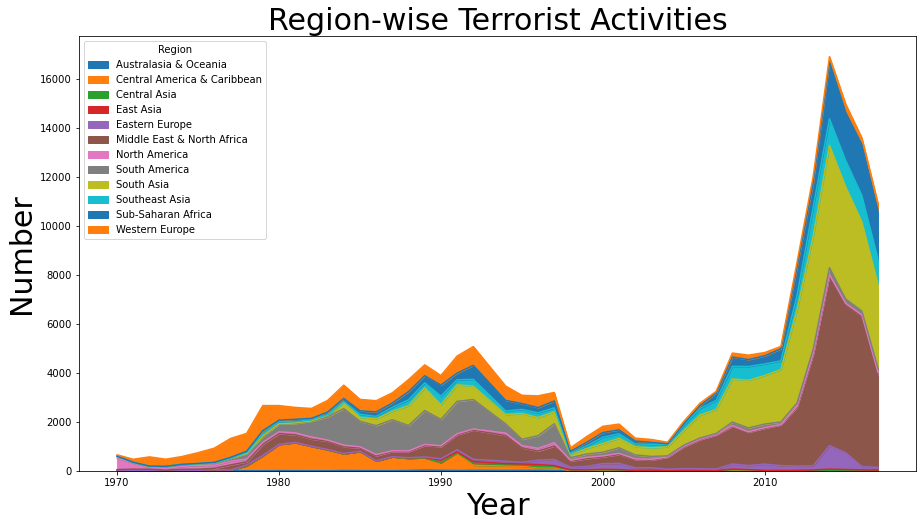

In [53]:
pd.crosstab(data.Year, data.Region).plot(kind='area', figsize=(15,8))
plt.title('Region-wise Terrorist Activities',fontsize=30)
plt.ylabel('Number',fontsize=30)
plt.xlabel("Year",fontsize=30)
plt.show()

#### Thus, we've got an area plot for region-wise terrorist attacks in different parts of the globe.

#### Around 2005, the volume of attacks seem to be increasing exponentially


### Afer 2010, there's a sharp increase led by Middle East and South-Asia

In [15]:
print('Country with Highest Terrorist Attacks:',data['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',data['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',data['kill'].max(),'that took place in',data.loc[data['kill'].idxmax()].Country)


Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq


###    Iraq tops the charts. We now want a plot showing some top troubled countries:

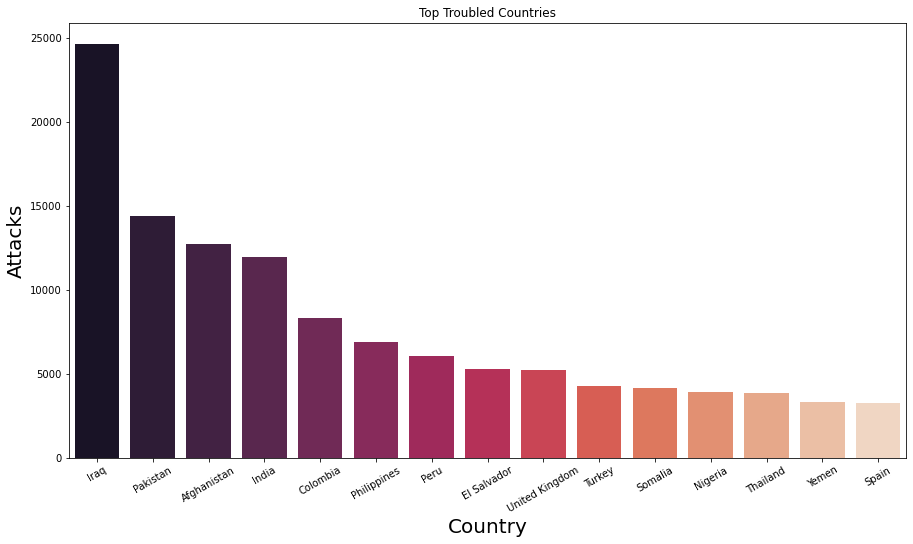

In [23]:
plt.subplots(figsize=(15,8))
sns.barplot(data['Country'].value_counts()[:15].index,data['Country'].value_counts()[:15].values,palette='rocket')
plt.title('Top Troubled Countries')
plt.xlabel('Country', fontsize=20)
plt.ylabel('Attacks', fontsize=20)
plt.xticks(rotation = 30)
plt.show()


### Next up, we would like to know the type of attacks that were most likely to trouble these countries in the period

#### Explosion, armed assault, assassination, Holding hostage, Attacks on infrastructure 
are some of the common types of attacks.

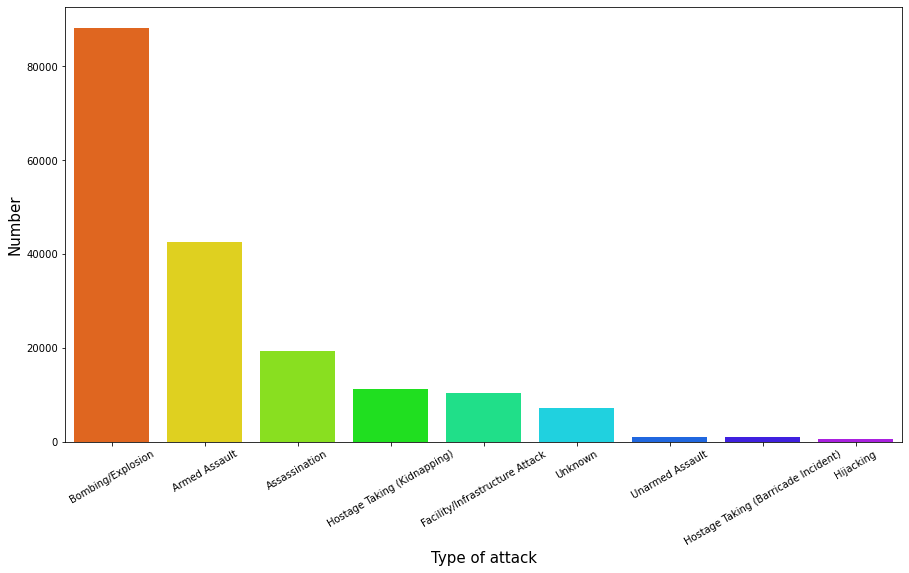

In [39]:

plt.subplots(figsize=(15,8))
sns.barplot(data['Attacktype'].value_counts().index,data['Attacktype'].value_counts().values,palette='gist_rainbow')


plt.ylabel("Number",fontsize=15)
plt.xlabel("Type of attack",fontsize=15)
plt.xticks(rotation = 30)
plt.show()

.

####  Clearly visible that Explosion has been a front-runner in the type of attacks, distantly followed by Armed assaults.



In [52]:
df=data[['Group','Country','Casualities']]
df=df.groupby(['Group','Country'],axis=0).sum().sort_values('Casualities',ascending=False).drop('Unknown').reset_index().head(10)
df

,Group,Country,Casualities
0,Taliban,Afghanistan,57140.0
1,Islamic State of Iraq and the Levant (ISIL),Iraq,54755.0
2,Boko Haram,Nigeria,24588.0
3,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,21919.0
4,Al-Qaida,United States,19494.0
5,Tehrik-i-Taliban Pakistan (TTP),Pakistan,15532.0
6,Shining Path (SL),Peru,14625.0
7,Al-Qaida in Iraq,Iraq,14348.0
8,Al-Shabaab,Somalia,14201.0
9,Farabundo Marti National Liberation Front (FMLN),El Salvador,12068.0



Next,

## What all are the terrorist groups engaged in these activities?
Let's attempt a plot by the no. of attacks they have carried out.


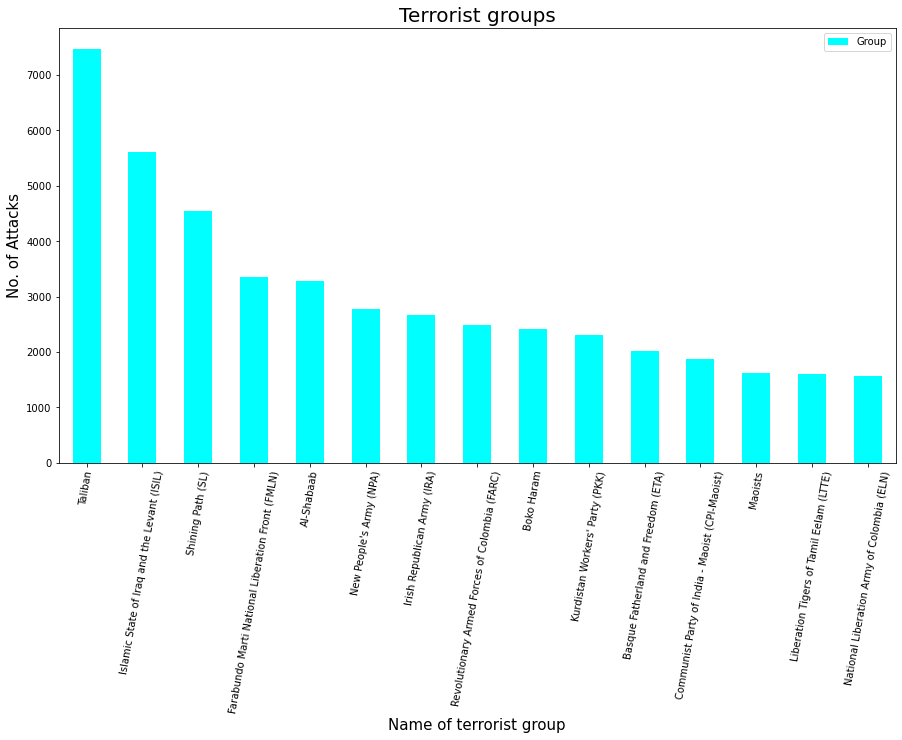

In [50]:
data['Group'].value_counts().to_frame().drop('Unknown').head(15).plot(kind='bar', color='aqua',figsize=(15,8))
plt.title("Terrorist groups",fontsize=20)
plt.xlabel("Name of terrorist group",fontsize=15)
plt.ylabel("No. of Attacks",fontsize=15)
plt.xticks(rotation = 80)
plt.show()

#### It is clearly visible that Taliban has attacked the most no. of times followed by ISIL.



let us now take a look at the year-wise terrorist activities: 

##   TERRORIST ACTIVITIES YEAR-WISE

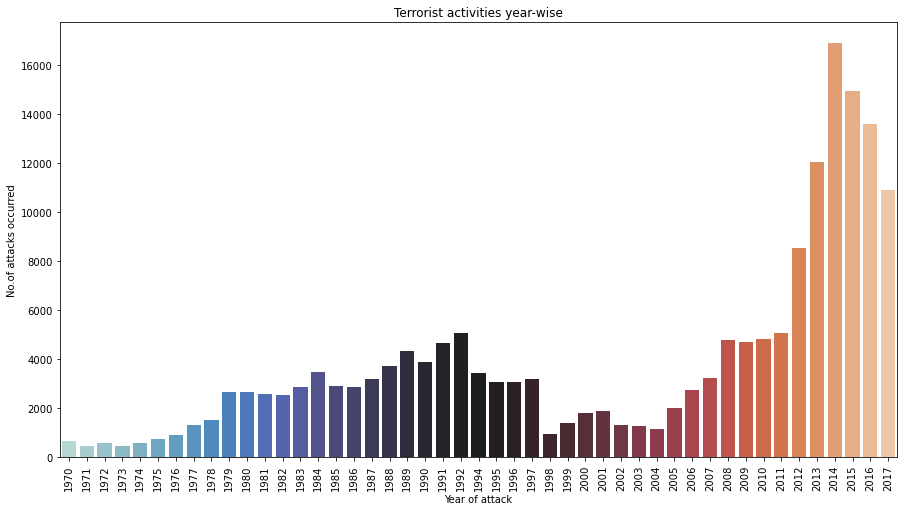

In [54]:
plt.subplots(figsize=(15,8))
sns.countplot('Year',data=data,palette='icefire')

plt.xlabel('Year of attack')
plt.title('Terrorist activities year-wise')
plt.ylabel('No.of attacks occurred')
plt.xticks(rotation=90)
plt.show()


Thus we saw region-wise and year-wise distribution of terrorist activities, groups involved, top troubled countries in the period 1970 to 2017.


### CONCLUDING REMARKS

1. It is visible that the post 2000s saw a sharp rise in terrorist activities.
2. 2014 was the year when the highest number of attacks took place.
3. Taliban and ISIL are the top 2 groups unleashing terror activities upto 2017.
4. Middle-East and North Africa region remain the most disturbed and terrorism-affected area on the globe.



#### Thank you